# Øvelse 5 - Fremtidens klima

I denne øvelsen ska vi bruke Toboksmodellen til å se korleis klimaet kommer til å endrer sig de neste 100 årene frem mot år 2100. Vi ska se på ulike fremskrivninger for strålingspådriv som er basert på ulike **sosioøkonomiske utviklingsbaner**. Det er de samme data som blir brukt i de komplekse klimamodellene som inngår i den nyeste IPCC rapporten.  

Vi skal beregne den fremtidige temperaturendringen med Toboksmodellen basert på disse utviklingsbanene, og sammenlikne med resultatene fra de globalle klimamodellene. Til slutt ska vi diskutere noen av de usikkerheter som er forbundet med klimaprognosene. Dette ska gi en økt forståelse av hvilke faktorer som påvirker fremtidens klima og samtidig forstå begrensninngene av klimamodellene i deres evne til å spå om fremtiden. 


## Sosioøkonomiske utviklingsbaner (SSPs)

For å kjøre toboksmodellen trenger vi information om det fremtidige strålingspådriv. Dette er representert gjennom de såkalte **sosioøkonomiske utviklingsbaner**  (Shared Socioeconomic Pathways; SSP). De inkluderer bla utfordringer innen tilpasning og utslippsreduserende tiltak, som populasjon, økonomisk vekst, utdanning, urbanisering og teknologisk utvikling.

<figure>
<img src="bilder/ssp_scenarier.png" style="width:50%" bla >
<figcaption align = "center"> Kilde: IPCC </figcaption>
</figure>

Utviklingsbanene beskriver fem alternative sosioøkonomiske framtider:

*    SSP1: Bærekraftig utvikling
*    SSP2: En middelvei
*    SSP3: Regional rivalisering
*    SSP4: Ulikhet
*    SSP5: Fossildrevet utvikling

Her ska vi særligt fokusere på de to yderpunktene: den Bærekraftige utviklingsbanen (SSP1) og den Fossildrevet utviklingsbanen (SSP5).


In [3]:
# Lese inn relavente python pakker vi ska bruke
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib notebook # inkluder denne linjen om du vil åpne i Jupyter Notebook og vil lage interaktive plott
%matplotlib inline

from toboks import calculate_temp_anomalies # henter funksjonen som beregner temperaturanomalier basert på toboksmodellen

## Les inn fremtids data (OBS IKKE OPDATERT MED NYE DATA)

Fremtidsdata for strålingspådriv er gemt i filen `futureForcing.csv` og dekker perioden fra år ????-2100. Som i de forrige øvelser er strålingspådrivet opdelt i bidrag fra drivhusgasser, solinnstråling .... *Bemærk at vulkanisk akivitet ikke er inkludert siden det ikke er så lett å spå om framtidige vulkanutbrudd.* 

* **Bruk koden nedenfor for å laste inn `futureForcing.csv`**

In [5]:
df=pd.read_csv('forcing-files/futureForcing.csv',index_col = 0,sep=',',encoding = "utf-8")

print('Strålingspådriv i W/m2 \n \n', df)

Strålingspådriv i W/m2 
 
         RCP2.6  RCP4.5  RCP6.0  RCP8.5
year                                  
1751.0  -0.021  -0.021  -0.021  -0.021
1752.0  -0.023  -0.023  -0.023  -0.023
1753.0  -0.023  -0.023  -0.023  -0.023
1754.0  -0.026  -0.026  -0.026  -0.026
1755.0  -0.027  -0.027  -0.027  -0.027
...        ...     ...     ...     ...
2086.0   2.424   3.752   4.492   6.802
2087.0   2.428   3.759   4.529   6.884
2088.0   2.432   3.766   4.566   6.966
2089.0   2.436   3.773   4.603   7.048
2090.0   2.440   3.780   4.640   7.130

[340 rows x 4 columns]


## Fremtidsscenarier med Toboksmodellen 

* Forsøk#1:'SSP1', bruk strålingspådriv for SSP1 med alle tilbakekoblingsmekanismer slået på. 

* Forsøk#2:'SSP5', bruk strålingspådriv for SSP5 med alle tilbakekoblingsmekanismer slået på. 

For begge forsøk bruker vi de samme tilbakekoblingsverdier som i Øvelse 3, som er basert på middelsverdier hentet fra de globale klimamodellene. 

**OBS MÅ OPDATERES MED NYESTE VERDIER**


**Beregn samlet strålingspådriv og sett verdier for varmeoptakk i havet (gamma) og tilbakekoblingseffekter (lambda)**

In [7]:
# varmeoptakk i havet [Wm-2K-1]                                                                                                                                                                           #//
gamma=-0.69  

# sett tilbakekoblingseffekter
lambda_planck=-3.1     # Stefan Boltzmann's 'feedback' [Wm-2K-1] best guesses  [-3.3 to -3.1]                       
lambda_lapse=-0.6      # Lapse rate feedback [Wm-2K-1] best guesses [-1.2 to -0.5]                                  
lambda_vanndamp=1.7       # water vapor feedback [Wm-2K-1] best guesses [1.5 to 2.2]                                   
lambda_sky=0.50      # Clouds feedback [Wm-2K-1] best guesses [0.1 to 1.2]                                       
lambda_albedo=0.40     # Surface albedo feedback [Wm-2K-1] best guesses [0.1 to 0.4]           

# Summen av disse 
lambda_sum=sum([lambda_planck,                                                                                      
    lambda_lapse,                                                                                                   
    lambda_vanndamp,                                                                                                   
    lambda_sky,                                                                                                   
    lambda_albedo]) 

**Kjør toboksmodellen for de to utslippsscenarioene med gjennomsnittsverdien for lamda_sum og studer plottet**

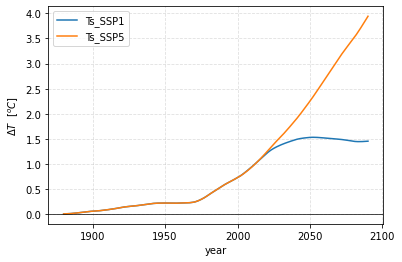

In [9]:
# lager en ny tom dataramme med samme index som den orginale
temp = pd.DataFrame(index=df.index)

# kaller opp funksjonen som regner ut temperaturendringene                                                          
temp['Ts_SSP1'], To = calculate_temp_anomalies(df['RCP2.6'].to_numpy(), lambda_sum, gamma)      # SSP1         
temp['Ts_SSP5'], To = calculate_temp_anomalies(df['RCP8.5'].to_numpy(), lambda_sum, gamma)      # SSP5         

#plotter innholdet i datarammen, starter plottet i 1880
temp.loc[1880:2090].plot(ylabel="$\Delta T$  $[^oC]$")
plt.axhline(y=0, linewidth=0.7, color="black")                                                                      
plt.grid(alpha=0.4, ls='--')  
plt.show()

## Korriger nullnivået (MÅ KANSJE ENDRES SÅ DET PASSER MED NYESTE RAPPORT)

Når politikere og medier snakker om 2-gradersmålet er det beregnet ut ifra en gjennosnittsverdi for periode 1986-2005. Våre resultater er beregnet utfra at 1750 var normalen. For å sammenligne våre modeller med de som presenteres i media (og IPCC rapporten) kan vi korrigere datasettet vårt ved å trekke fra gjennomsnittsverdien til modellen for perioden 1986 til 2005.

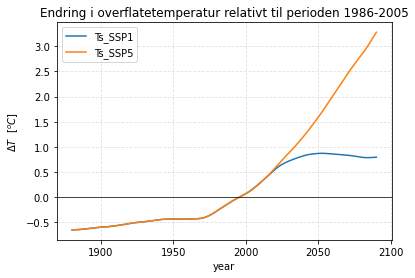

In [11]:
# lager en ny tom dataramme med samme index som den orginale
Tanom = pd.DataFrame(index=df.index)

# temperature anomali fra perioden 1986-2005
Tanom['Ts_SSP1'] =  temp['Ts_SSP1']- temp['Ts_SSP1'].loc[1986:2005].mean() # temp. anomaly
Tanom['Ts_SSP5'] =  temp['Ts_SSP5']- temp['Ts_SSP5'].loc[1986:2005].mean() # temp. anomaly

# make plot
#plotter innholdet i datarammen, starter plottet i 1880
Tanom.loc[1880:2090].plot(ylabel="$\Delta T$  $[^oC]$", title='Endring i overflatetemperatur relativt til perioden 1986-2005')
plt.axhline(y=0, linewidth=0.7, color="black")                                                                      
plt.grid(alpha=0.4, ls='--')  
plt.show()          


**Finn temperaturendringen i år 2100**

In [13]:
year = 2090
Tloc = Tanom['Ts_SSP1'].loc[year]
print('Temperature change at year', year, ':', "%.2f" %(Tloc),'°C')

Temperature change at year 2090 : 0.79 °C


# Spørgsmål til opgaven

### 1 - Investigate the temperature change into the future

* Hva er det samlede strålingspådriv (i W/m2) i år 2100 for SSP1 og SSP5?

* Calculate the change in surface temperature relative to year 1986-2005 (same as used by IPCC AR5)

* Hva er temperaturendringen i år 2100 (relativt til 1986-2005) for SSP1 og SSP5?

* Hva er den viktigste årsaken til disse ændringer? 


## 2 - Sammenlign med de globalle klimamodellene 

I plottet nedenfor vises den globalle temperaturendringen simulert av de nyeste og mest avancerte klimamodellene. 

**OBS: ADD PLOT OF CMIP6 MODELS**

<img src="bilder/AR5-temp-change-to-2100.png" style="width:50%" >

* Undersøk plottet og diksuter hvordan vores simple Toboksmodel klarer sig i forhold til de globalle modellene. 

I plottet ser vi at der er ganske stor spredning i temperaturutviklingen blant de globalle modellene.  

* Hva tror du er den viktiske årsaken til denne usikkerhet i fremtidsprojektionene? Mulige årsaker ku være:
    * Usikkerhet i forcing
    * Usikkerhet i model-fysik (fx. hvordan skyer er representert)
    * Intern klimavariabilitet
    
* Hvorfor tror du at spredningen vokser jo lengere vi kommer ut i fremtiden?
    

# 3 - Make our own "multi-model" ensemble (BLIR KANSJE FOR MYE??)

A model-ensemble describes a collection of models typically performing the same set of experiments, i.e. like the CMIP5 climate models shown in the first figure. Although we only have one model (2boxmodel), we can still mimic this by choosing different values for the feedback parameters and running the RCP2.6 and RCP8.5 experiments again. 

In the runs above we used the mean values for the feedback parameters from the table below. Now, perform two additional runs (repeat for both RCP2.6 and RCP8.5):

* Run#3&5 - picking the *minimum* values for the feedback parameters (see table)
* Run#4&6 - picking the *maximum* values for the feedback parameters (see table)

<img src="Bilder/table_lambda_values.png" style="width:50%" >

## Ekstra: Hvilken betydning har dyphavet?

I øvelse 4 så vi at *havet* spillet en viktig rolle for å ta opp den ekstra varme fra atmosfæren særligt siden den industrielle revolution. Varmeopptaket til havet bidrager altså til at bremse den globalle oppvarmingen i atmosfæren. *Hvordan ser dette ut for fremtidens klima?*

Gå opp i programmet bytt ut gamma=-0.69, med gamma=0 og kjør alle cellene på nytt.

* Hva sker for overflatetemperaturen (`Ts`) om vi slår av varmeoptaket til havet? 

* Tror du at havet vil bli ved med at ta opp ekstra varme fra atmosfæren? Hvorfor/hvorfor ikke?